### Importação dos dados



In [14]:

import pandas as pd

url1 = "https://raw.githubusercontent.com/CidQueiroz/challenge_alurastore/refs/heads/main/loja_1.csv"
url2 = "https://raw.githubusercontent.com/CidQueiroz/challenge_alurastore/refs/heads/main/loja_2.csv"
url3 = "https://raw.githubusercontent.com/CidQueiroz/challenge_alurastore/refs/heads/main/loja_3.csv"
url4 = "https://raw.githubusercontent.com/CidQueiroz/challenge_alurastore/refs/heads/main/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()
loja2.head()
loja3.head()
loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


In [23]:
import matplotlib.pyplot as plt

# Cálculo do faturamento
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Dicionário com os faturamentos
faturamentos = {
    "Loja 1": faturamento_loja1,
    "Loja 2": faturamento_loja2,
    "Loja 3": faturamento_loja3,
    "Loja 4": faturamento_loja4
}

# Impressão dos valores
print("ANÁLISE DO FATURAMENTO")
for loja, valor in faturamentos.items():
    print(f"{loja}: R$ {valor:.2f}")

# Verifica qual loja teve o maior faturamento
loja_mais_faturou = max(faturamentos, key=faturamentos.get)
print(f"\n✅ A loja que mais faturou foi: {loja_mais_faturou} (R$ {faturamentos[loja_mais_faturou]:.2f})")



ANÁLISE DO FATURAMENTO
Loja 1: R$ 1534509.12
Loja 2: R$ 1488459.06
Loja 3: R$ 1464025.03
Loja 4: R$ 1384497.58

✅ A loja que mais faturou foi: Loja 1 (R$ 1534509.12)


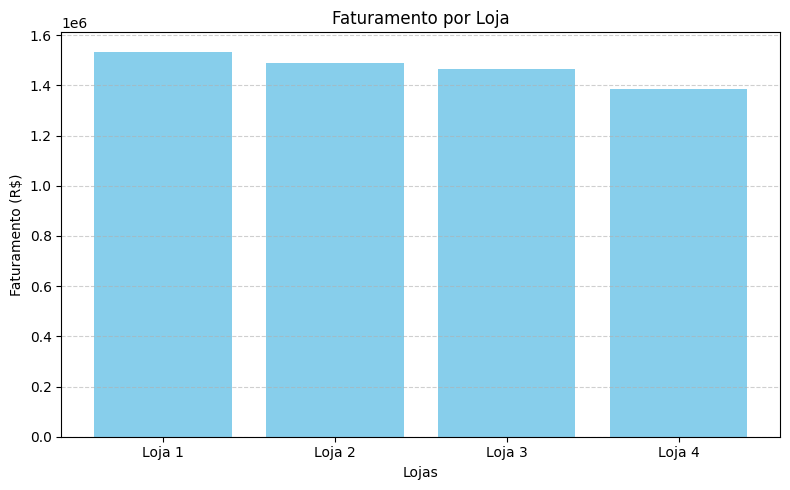

In [21]:
plt.figure(figsize=(8, 5))
plt.bar(faturamentos.keys(), faturamentos.values(), color='skyblue')
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [22]:
vendas_por_categoria_loja1 = loja1.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)


print("\n VENDAS POR CATEGORIA - LOJA 1 ")
print(vendas_por_categoria_loja1)



=== VENDAS POR CATEGORIA - LOJA 1 ===
Categoria do Produto
eletronicos              572659.23
eletrodomesticos         484913.36
moveis                   250178.11
instrumentos musicais    121731.69
esporte e lazer           52387.55
brinquedos                23993.78
utilidades domesticas     16931.48
livros                    11713.92
Name: Preço, dtype: float64


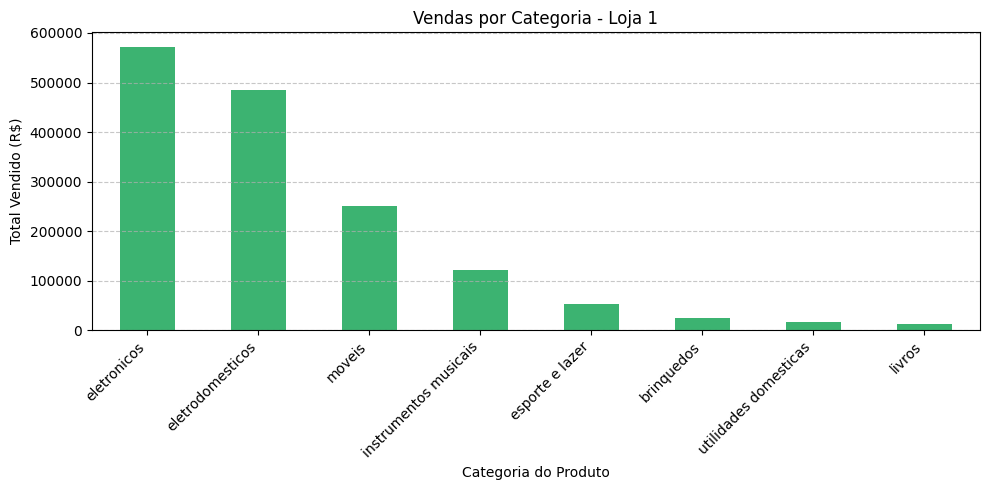

In [24]:
plt.figure(figsize=(10, 5))
vendas_por_categoria_loja1.plot(kind='bar', color='mediumseagreen')
plt.title('Vendas por Categoria - Loja 1')
plt.xlabel('Categoria do Produto')
plt.ylabel('Total Vendido (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [27]:
avaliacoes = {
    "Loja 1": loja1['Avaliação da compra'].mean(),
    "Loja 2": loja2['Avaliação da compra'].mean(),
    "Loja 3": loja3['Avaliação da compra'].mean(),
    "Loja 4": loja4['Avaliação da compra'].mean()
}

# Impressão das médias
print("\n=== MÉDIA DE AVALIAÇÃO POR LOJA ===")
for loja, media in avaliacoes.items():
    print(f"{loja}: {media:.2f}")


=== MÉDIA DE AVALIAÇÃO POR LOJA ===
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


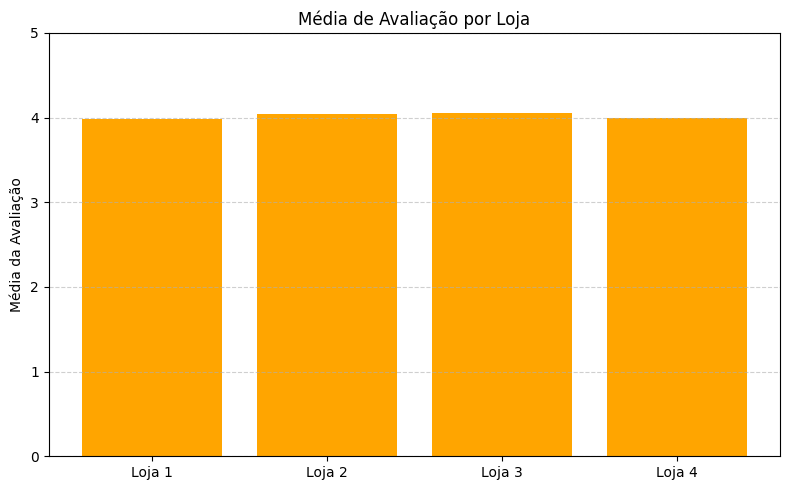

In [28]:
plt.figure(figsize=(8, 5))
plt.bar(avaliacoes.keys(), avaliacoes.values(), color='orange')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Média da Avaliação')
plt.ylim(0, 5)  # assumindo escala de 0 a 5
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [30]:

todas_lojas = pd.concat([loja1, loja2, loja3, loja4])


contagem_produtos = todas_lojas['Produto'].value_counts()


print("\n 5 PRODUTOS MAIS VENDIDOS ")
print(contagem_produtos.head(5))


print("\n 5 PRODUTOS MENOS VENDIDOS ")
print(contagem_produtos.tail(5))



 5 PRODUTOS MAIS VENDIDOS 
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Name: count, dtype: int64

 5 PRODUTOS MENOS VENDIDOS 
Produto
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


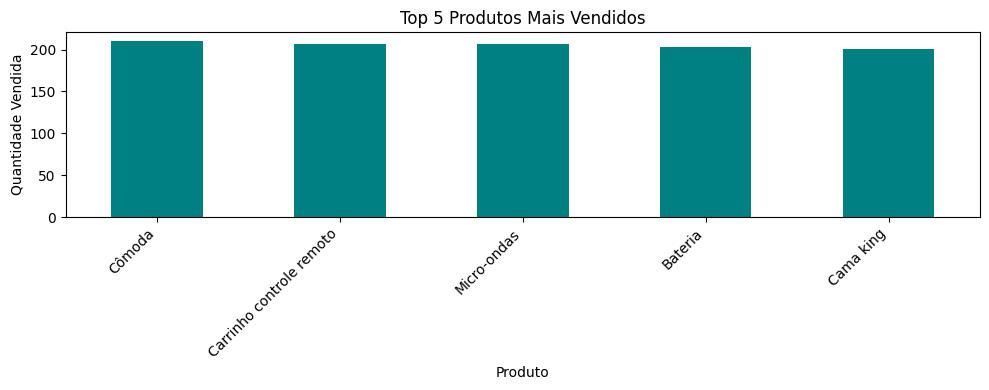

In [31]:
plt.figure(figsize=(10,4))
contagem_produtos.head(5).plot(kind='bar', color='teal')
plt.title('Top 5 Produtos Mais Vendidos')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Produto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [32]:
fretes = {
    "Loja 1": loja1['Frete'].mean(),
    "Loja 2": loja2['Frete'].mean(),
    "Loja 3": loja3['Frete'].mean(),
    "Loja 4": loja4['Frete'].mean()
}

# Imprime os resultado
print("\n FRETE MÉDIO POR LOJA ")
for loja, valor in fretes.items():
    print(f"{loja}: R$ {valor:.2f}")


 FRETE MÉDIO POR LOJA 
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


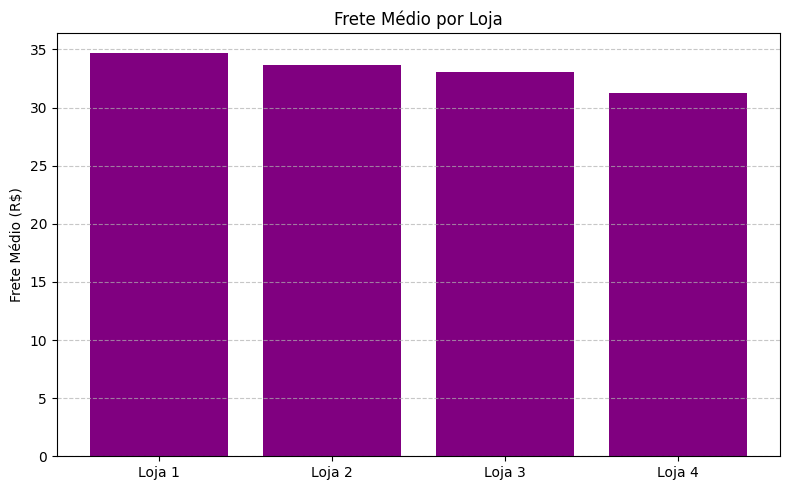

In [33]:
plt.figure(figsize=(8, 5))
plt.bar(fretes.keys(), fretes.values(), color='purple')
plt.title('Frete Médio por Loja')
plt.ylabel('Frete Médio (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()